In [1]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mask_roi(image_path):
    image = cv2.imread(image_path)
    dct={}
    # Chuyển đổi ảnh từ BGR sang HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    dct.update({'hsv_image':hsv_image})
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    dct.update({'gray_image':gray_image})
    hsl_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    dct.update({'hsl_image':hsl_image})
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    dct.update({'lab_image':lab_image})
    luv_image = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
    dct.update({'luv_image':luv_image})
    xyz_image = cv2.cvtColor(image, cv2.COLOR_BGR2XYZ)
    dct.update({'xyz_image':xyz_image})
    yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    dct.update({'yuv_image':yuv_image})
    
    # Hiển thị ảnh gốc, mask, và ROI
    plt.figure(figsize=(30,10))
    i=1
    for name, val in dct.items():    
        plt.subplot(1, 8, i)
        i+=1
        plt.imshow(val)
        plt.title(f'{name}')

    plt.subplot(1, 8, i)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(f'original_image \n{image.shape[0]}x{image.shape[1]}')

    plt.show()

In [5]:
path='D:/Work/Water Environment Pollution/hinhanh_05082024/hinhanh/full/'


In [5]:
image = '0aNvD_ngochanpham274@gmail.com_2024-08-01 15_48_54_10 ppm_R2_P1_F_1.3356_10.8769656_106.6783962.jpg'

In [14]:
image = '0G5zZ_ngochanpham274@gmail.com_2024-06-03 12_10_19_0.06 ppm_0.06_R1_P1_0_Phuc__.jpg'

In [7]:
image = '0viTH_ngochanpham274@gmail.com_2024-06-03 11_44_52_0.01 ppm_0.01_R1_P3_0_Phuc__.jpg'

In [8]:
image = '0hnK2_ngochanpham274@gmail.com_2024-06-10 11_54_59_0.04_0.04_R2_P1_0_Linh__.jpg'

In [9]:
image = 'Cvjzg_ngochanpham274@gmail.com_2024-08-02 09_47_19___10.876833297582_106.67842910184.jpg'

In [3]:
a = 'D:/Work/Water Environment Pollution/folder/full/0hnK2_ngochanpham274@gmail.com_2024-06-10 11_54_59_0.04_0.04_R2_P1_0_Linh__.jpg'

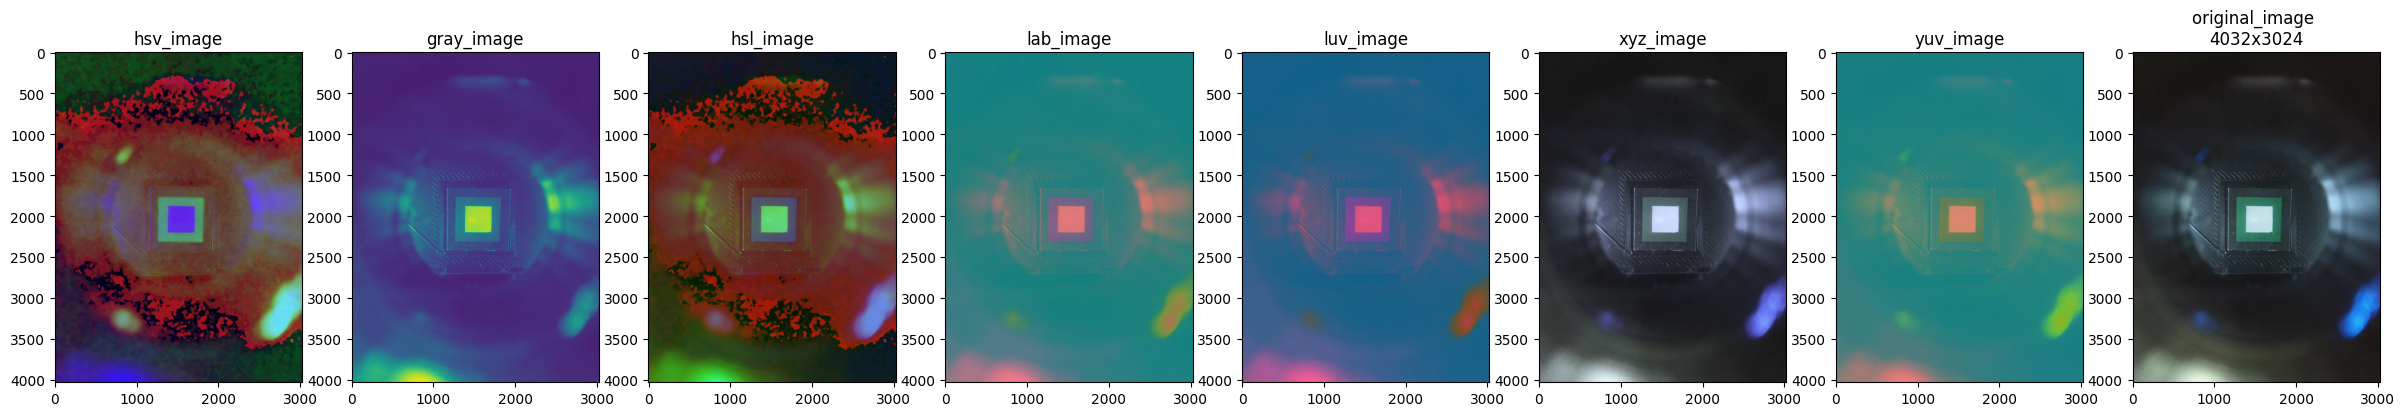

In [15]:
mask_roi(path+image)

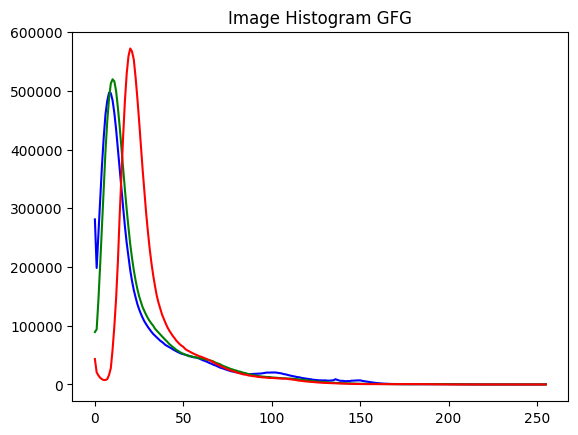

In [10]:
# define colors to plot the histograms 
colors = ('b','g','r') 
img = cv2.imread(path+image)
# compute and plot the image histograms 
for i,color in enumerate(colors): 
    hist = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.plot(hist,color = color) 
plt.title('Image Histogram GFG') 
plt.show()

In [11]:
def apply_clahe(image,threshold=2,gridsize=8):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    # mean_l = np.mean(l)
    clahe = cv2.createCLAHE(clipLimit=threshold, tileGridSize=(gridsize,gridsize))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return final, limg

In [13]:
# adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
#                                                 cv2.THRESH_BINARY, 11, 2)

Text(0.5, 1.0, 'Clahe_image-2-64\n4032x3024')

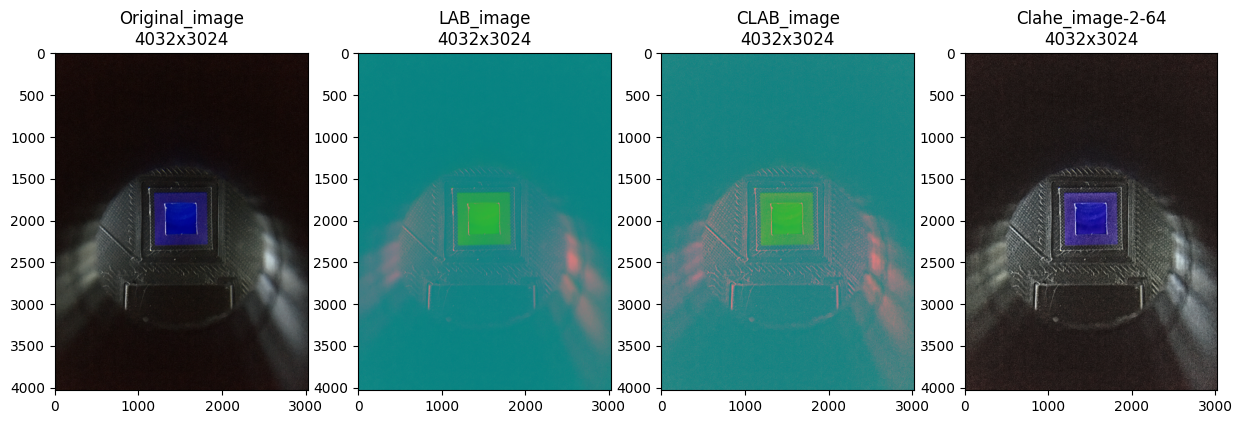

In [12]:
img = cv2.imread(path+image)
threshold= 2
gridsize = 64
clahe_img, limg=apply_clahe(img,threshold,gridsize)


plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title(f'Original_image\n{img.shape[0]}x{img.shape[1]}')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2LAB))
plt.title(f'LAB_image\n{img.shape[0]}x{img.shape[1]}')

plt.subplot(1, 4, 3)
plt.imshow(limg)
plt.title(f'CLAB_image\n{img.shape[0]}x{img.shape[1]}')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(clahe_img,cv2.COLOR_BGR2RGB))
plt.title(f'Clahe_image-{threshold}-{gridsize}\n{clahe_img.shape[0]}x{clahe_img.shape[1]}')

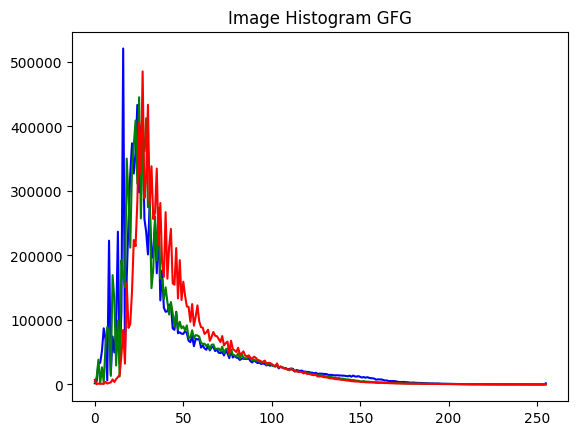

In [13]:
for i,color in enumerate(colors): 
    hist = cv2.calcHist([clahe_img],[i],None,[256],[0,256]) 
    plt.plot(hist,color = color) 
plt.title('Image Histogram GFG') 
plt.show()

Text(0.5, 1.0, 'Original_image\n4032x3024')

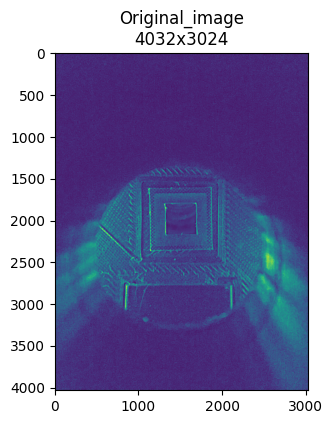

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(clahe_img,cv2.COLOR_BGR2GRAY))
plt.title(f'Original_image\n{clahe_img.shape[0]}x{clahe_img.shape[1]}')